In [2]:
import pandas as pd
import numpy as np
import os
import nltk
import nltk.translate.bleu_score as bleu
import matplotlib.pyplot as plt
import seaborn as sns
from multiprocessing import  Pool
import pickle
from rouge import Rouge 

Define the data path and get the list of folder inside the data path

In [9]:
PATH = os.getcwd()

DATA_PATH = os.path.join(PATH, 'results_bert_score\\')
print(DATA_PATH)

C:\Data\Personal\sanjyot\TM\results_bert_score\


In [12]:
data_dir_list = os.listdir(DATA_PATH)
# data_dir_list.remove('results_small')
# data_dir_list.remove('.ipynb_checkpoints')
# data_dir_list

datadict = {}
for folder in data_dir_list:
    fname=folder.split("_")[2]
#     print(fname)
    datadict[fname] = pd.read_pickle(DATA_PATH+folder)

In [45]:
# datadict['cs-en'].head()

In [21]:
# # nltk test
# hypothesis = ['It', 'is', 'a', 'cat', 'at', 'room']
# reference = ['It', 'is', 'a', 'cat', 'inside', 'the', 'room']
# #there may be several references
# BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
# print(BLEUscore)

0.4548019047027907


In [40]:
# hypothesis = ["open", "the", "file"]
# reference = ["open", "file"]
# #the maximum is bigram, so assign the weight into 2 half.
# BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis, weights = (0.5, 0.5))
# print(BLEUscore)

In [41]:
# reference1 = 'the cat is on the mat'.split()
# reference2 = 'there is a cat on the mat'.split()
# hypothesis1 = 'the cat the the the the the'.split()
# references = [reference1, reference2]
# float(nltk.translate.bleu_score.modified_precision(references, hypothesis1, n=2)) 
# # nltk.translate.bleu_score.sentence_bleu(references, hypothesis1, weights = (0, 1))

In [14]:
# chencherry = nltk.translate.bleu_score.SmoothingFunction()
# 
rouge = Rouge()
for langpair in datadict.keys():
    datadict[langpair]['bleu_metric_mod_prec'] = datadict[langpair].apply(
        lambda row: 
        float(
            nltk.translate.bleu_score.modified_precision(
                row['reference'],
                row['translation'],
                n=1
                # smoothing_function=chencherry.method2
            )
        ),
        axis=1
    )

    # chencherry = nltk.translate.bleu_score.SmoothingFunction()
    datadict[langpair]['bleu_metric_sen_bleu'] = datadict[langpair].apply(
        lambda row: 
        float(
            nltk.translate.bleu_score.sentence_bleu(
                row['reference'],
                row['translation'],
                weights = (0.5, 0.5)
    #             smoothing_function=chencherry.method2
            )
        ),
        axis=1
    )

    datadict[langpair]['Rouge1_metric_f'] = datadict[langpair].apply(
        lambda row: 
        rouge.get_scores(row['translation'], row['reference'])[0]['rouge-1']['f'],
        axis=1
    )

    datadict[langpair]['Rouge1_metric_r'] = datadict[langpair].apply(
        lambda row: 
        rouge.get_scores(row['translation'], row['reference'])[0]['rouge-1']['r'],
        axis=1
    )

    datadict[langpair]['Rouge1_metric_p'] = datadict[langpair].apply(
        lambda row: 
        rouge.get_scores(row['translation'], row['reference'])[0]['rouge-1']['p'],
        axis=1
    )

    datadict[langpair]['Rouge2_metric_f'] = datadict[langpair].apply(
        lambda row: 
        rouge.get_scores(row['translation'], row['reference'])[0]['rouge-2']['f'],
        axis=1
    )

    datadict[langpair]['Rouge2_metric_r'] = datadict[langpair].apply(
        lambda row: 
        rouge.get_scores(row['translation'], row['reference'])[0]['rouge-2']['r'],
        axis=1
    )

    datadict[langpair]['Rouge2_metric_p'] = datadict[langpair].apply(
        lambda row: 
        rouge.get_scores(row['translation'], row['reference'])[0]['rouge-2']['p'],
        axis=1
    )

    datadict[langpair]['RougeL_metric_f'] = datadict[langpair].apply(
        lambda row: 
        rouge.get_scores(row['translation'], row['reference'])[0]['rouge-l']['f'],
        axis=1
    )

    datadict[langpair]['RougeL_metric_r'] = datadict[langpair].apply(
        lambda row: 
        rouge.get_scores(row['translation'], row['reference'])[0]['rouge-l']['r'],
        axis=1
    )

    datadict[langpair]['RougeL_metric_p'] = datadict[langpair].apply(
        lambda row: 
        rouge.get_scores(row['translation'], row['reference'])[0]['rouge-l']['p'],
        axis=1
    )
    
    datadict[langpair].to_csv(
        f"./results_bert_score/result_all_metrics_{langpair}_{len(datadict[langpair])}_rec.csv",
        index=True
    )

In [15]:
datadict['cs-en']

,source,reference,translation,z-score,avg-score,annotators,bert_metric_p,bert_metric_r,bert_metric_f,bleu_metric_mod_prec,bleu_metric_sen_bleu,Rouge1_metric_f,Rouge1_metric_r,Rouge1_metric_p,Rouge2_metric_f,Rouge2_metric_r,Rouge2_metric_p,RougeL_metric_f,RougeL_metric_r,RougeL_metric_p
2408,"Louis Galicia uvedl, že Frank nejprve přespáva...",Louis Galicia said that Frank first slept in h...,Louis Galicia said Frank initially stayed in h...,0.310603,68.000000,1,0.662417,0.694500,0.678936,0.229358,7.143795e-155,0.500000,0.500000,0.500000,0.235294,0.235294,0.235294,0.514286,0.529412,0.500000
9801,Na poslední olympiádě se Gabby Dougalsová přek...,"At the last Olympics, Gabby Dougalsová surpris...","Last Olympics, Gabby Douglas was a surprise Ol...",0.084275,85.000000,2,0.672252,0.397855,0.532368,0.304878,8.236359e-155,0.344828,0.294118,0.416667,0.148148,0.125000,0.181818,0.370370,0.333333,0.416667
3660,Zemětřesení kolem Putina?,An earthquake around Putin?,Putin in the centre of a political earthquake?,0.516965,87.000000,2,0.335504,0.502664,0.418729,0.304348,8.229194e-155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9695,"Podle jeho manželky je to nejvyšší hladina, kt...","According to his wife, it's the highest level ...",His wife told Hansford that it's the highest s...,0.807391,92.500000,2,0.444094,0.502304,0.473900,0.220000,6.996544e-155,0.473684,0.473684,0.473684,0.222222,0.222222,0.222222,0.424242,0.411765,0.437500
10268,Třetina vozů je v současnosti vybavená klimati...,A third of the cars are currently equipped wit...,The state-owned carrier operates over two thou...,-1.607737,0.000000,1,0.112691,0.095744,0.105659,0.174603,6.233017e-155,0.050000,0.043478,0.058824,0.000000,0.000000,0.000000,0.055556,0.050000,0.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,"Za prvé, byl jsem na každé letní olympiádě od ...","Firstly, I have been to every summer Olympics ...","First, I have been to every Summer Olympics si...",1.011464,98.000000,2,0.975921,0.975923,0.975961,0.319149,8.426921e-155,0.833333,0.833333,0.833333,0.705882,0.705882,0.705882,0.823529,0.823529,0.823529
7566,Šéf humanitárních operací OSN Stephen O'Brien ...,"The UN's head of humanitarian operations, Step...","The UN Emergency Relief Coordinator, Stephen O...",-0.584293,70.000000,1,0.705991,0.688339,0.697643,0.223022,7.044427e-155,0.355556,0.347826,0.363636,0.139535,0.136364,0.142857,0.372093,0.363636,0.380952
5439,"Zákon předvídá situaci, kdy může být do specia...",The law provides for a situation where the spe...,The law foresees a situation where professiona...,0.071735,75.000000,1,0.529277,0.499706,0.515240,0.105042,4.834524e-155,0.647887,0.638889,0.657143,0.376812,0.371429,0.382353,0.571429,0.580645,0.562500
9989,Redaktor Rubeš měl ale horší zkušenosti.,But the editor R had a worse experience.,The journalist Rubeš had a worse experience.,0.231400,79.500000,2,0.520488,0.663719,0.591843,0.409091,9.540742e-155,0.533333,0.500000,0.571429,0.461538,0.428571,0.500000,0.533333,0.500000,0.571429


In [64]:
datadict.keys()

dict_keys(['cs-en', 'de-en', 'en-fi', 'en-zh', 'ru-en', 'zh-en'])

In [70]:
# plt.scatter(datadict['cs-en']['bleu_metric_mod_prec'], datadict['cs-en']['z-score'])
# plt.show()

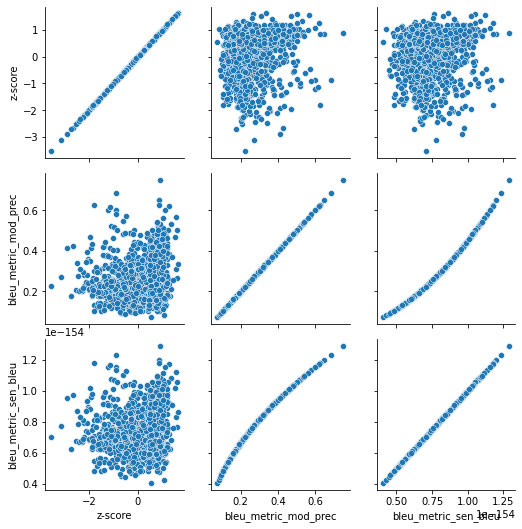

In [16]:
g = sns.PairGrid(datadict['cs-en'].filter(regex='bleu|z-score', axis=1))
g.map(sns.scatterplot)

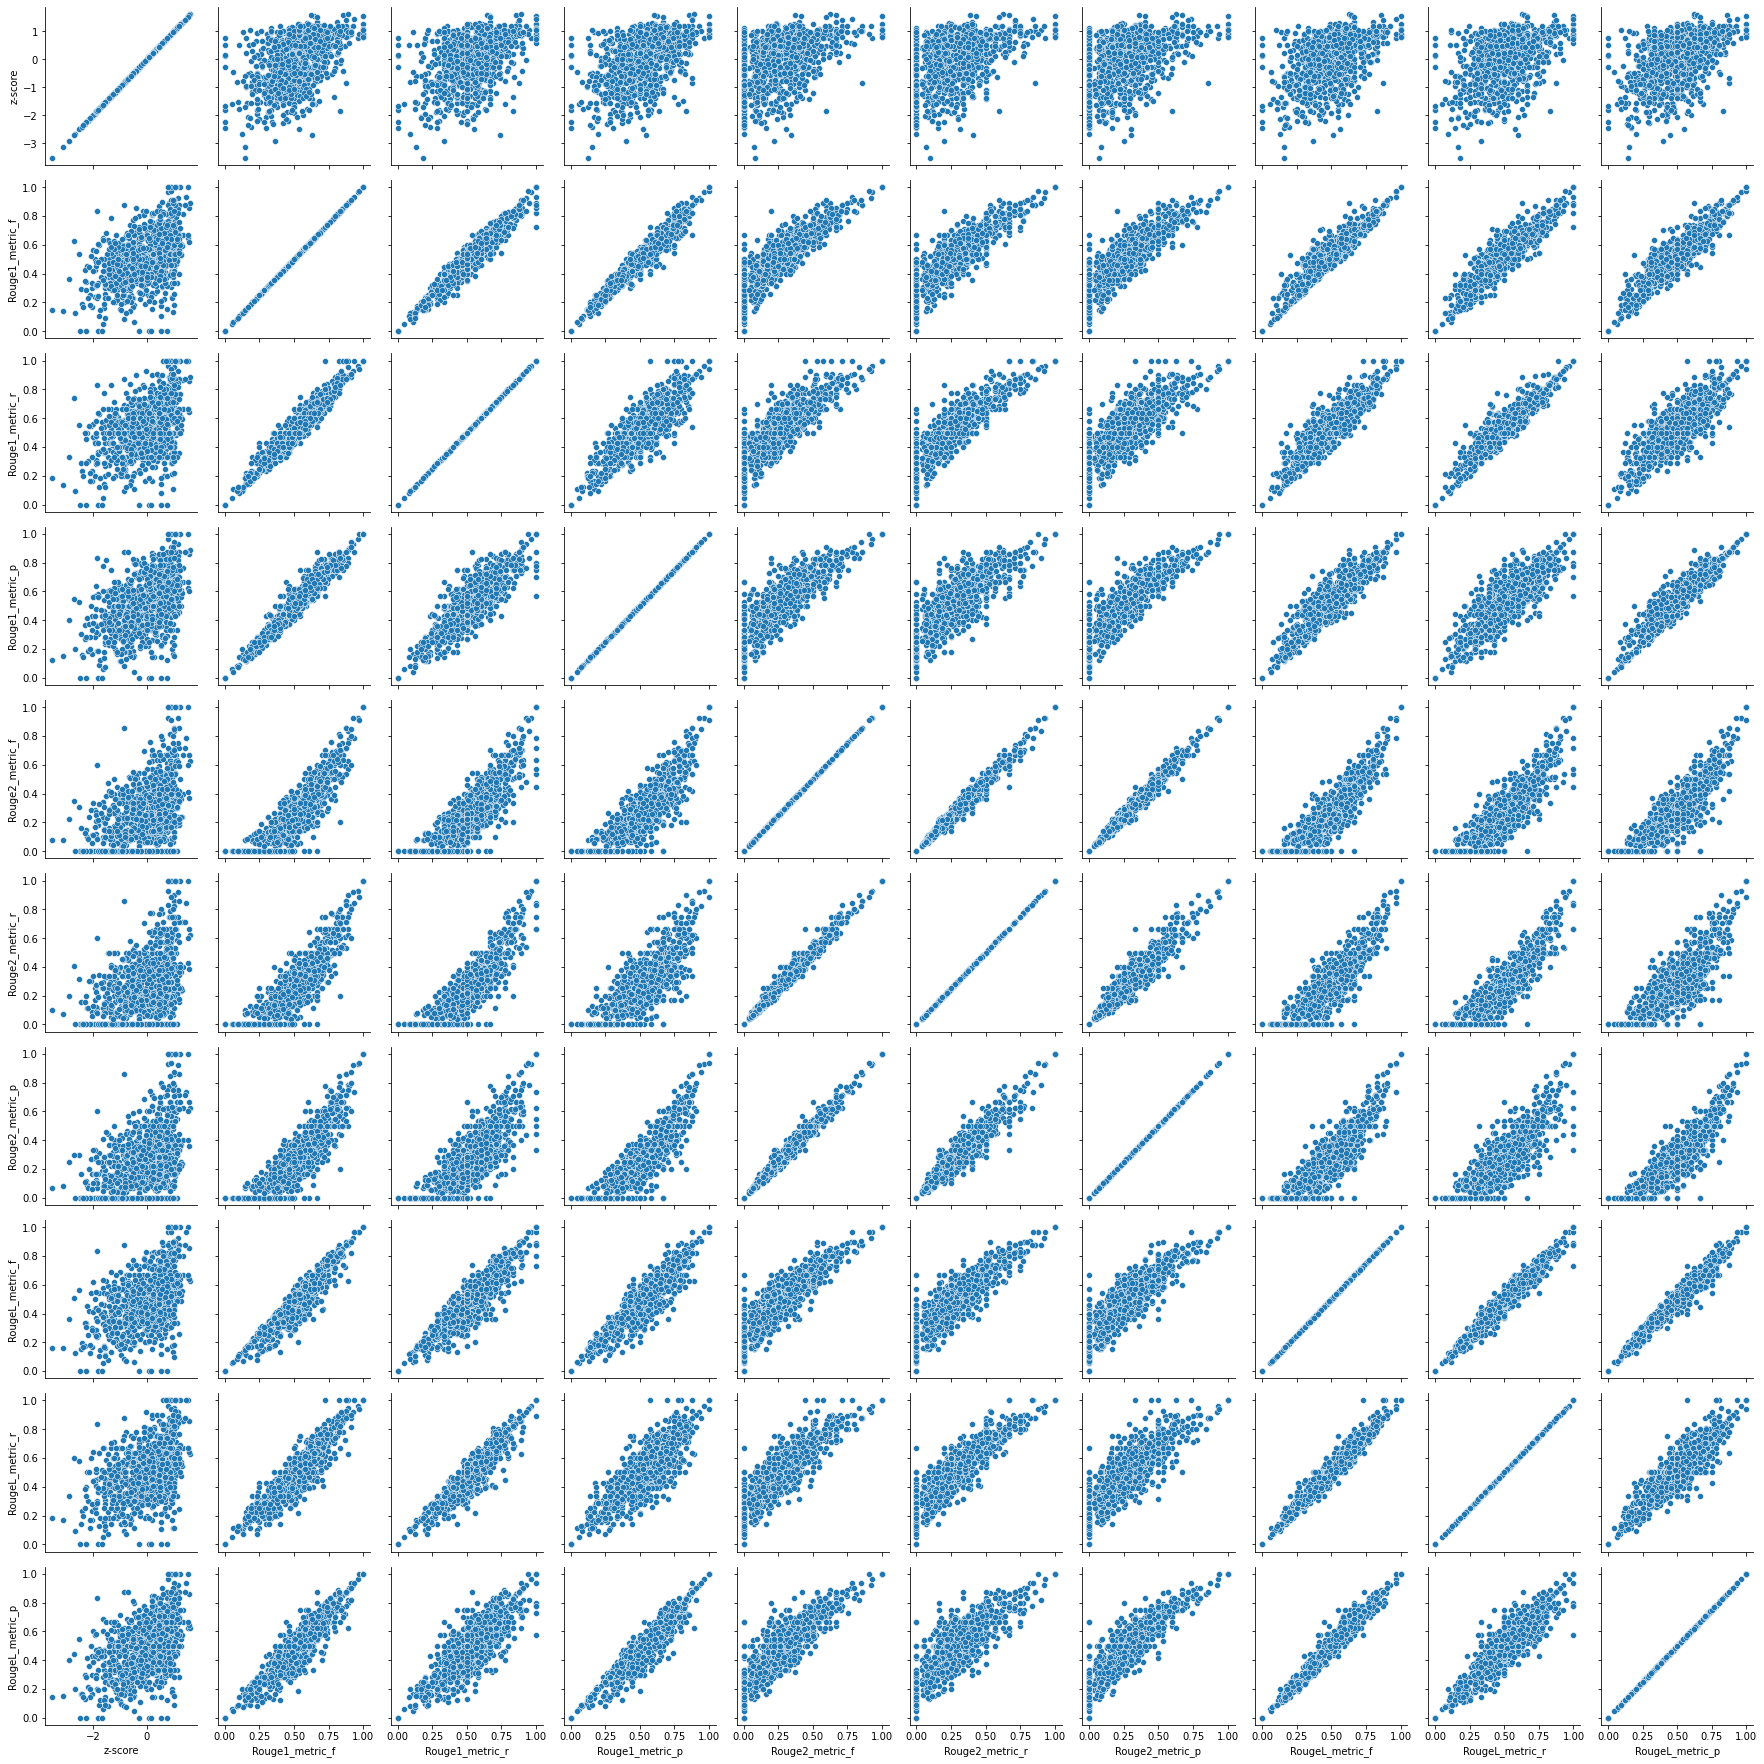

In [17]:
g = sns.PairGrid(datadict['cs-en'].filter(regex='Rouge|z-score', axis=1))
g.map(sns.scatterplot)

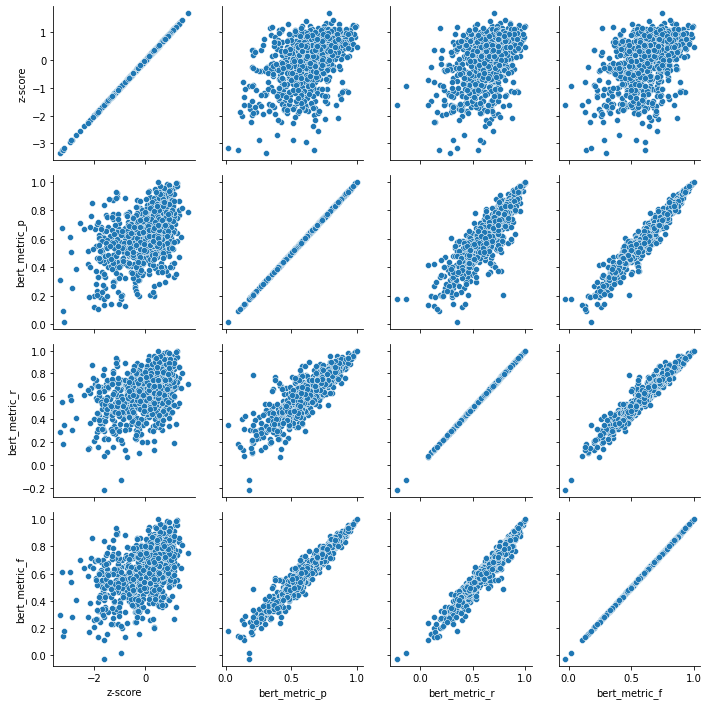

In [18]:
# df
g = sns.PairGrid(datadict['ru-en'].filter(regex='bert|z-score', axis=1))
g.map(sns.scatterplot)

In [81]:
datadict.keys()

dict_keys(['cs-en', 'de-en', 'en-fi', 'en-zh', 'ru-en', 'zh-en'])

In [37]:
df = datadict['de-en'].filter(
    regex='bleu|Rouge|bert|z-score',
    axis=1
)

# plt.matshow(df.corr())
# plt.show()

# f = plt.figure(figsize=(19, 15))
# plt.matshow(df.corr(), fignum=f.number)
# plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
# plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16)
# corr = df.corr()
# corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<AxesSubplot:>

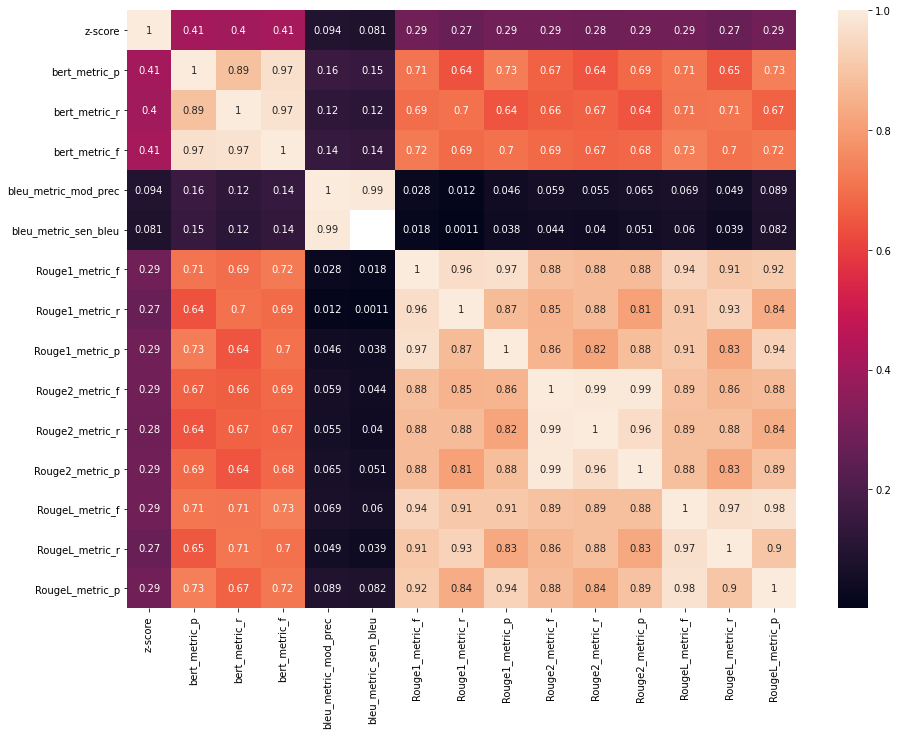

In [38]:
import seaborn as sns
plt.figure(figsize=(15, 11))
corr = df.corr()
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    annot=True
)